In [ ]:
import pandas as pd
data1 = pd.read_csv('datasets/diabetes.csv')
data1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
# Import Decision Tree Classifier
# used for creating tree structure where each internal node represents a decision based on feature values, and the leaf nodes represent class labels.
from sklearn.tree import DecisionTreeClassifier

# Import train_test_split function
# used to split a dataset into training and testing subsets.
from sklearn.model_selection import train_test_split

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [11]:
# splitting dataset in features and target variable

#split dataset in features and target variable

# Features
# get_dummies used to convert categorical variables into numerical variables by creating dummy/indicator variables
X = data1[['Pregnancies','BMI','Age']] # Features

# Target variable
y = data1['Outcome'] # Target variable. since other variables effect the age and age effects the rings

In [15]:
# model is training using the training data
# when training is done, we use the test data to evaluate how well the data does
# based on that we tune the the hyperparameters etc. and train again. loop if needed
# test data is the data that model hasn’t seen before.

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
# random state simply sets a seed to the random generator
#  so that train-test splits are always deterministic 
#  if you don't set a seed, it is different each time

In [16]:
#CHANGING THE DEPTH OF DECISION TREE

# Create Decision Tree classifer object
# Entropy is a measure of impurity or randomness in the data. In the context of decision trees,
# it helps decide the optimal way to split data at each node.
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
# .fit trains the model on the given dataset
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
# uses the trained decision tree (clf) to make predictions on new data (X_test)
y_pred = clf.predict(X_test)

In [17]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7402597402597403


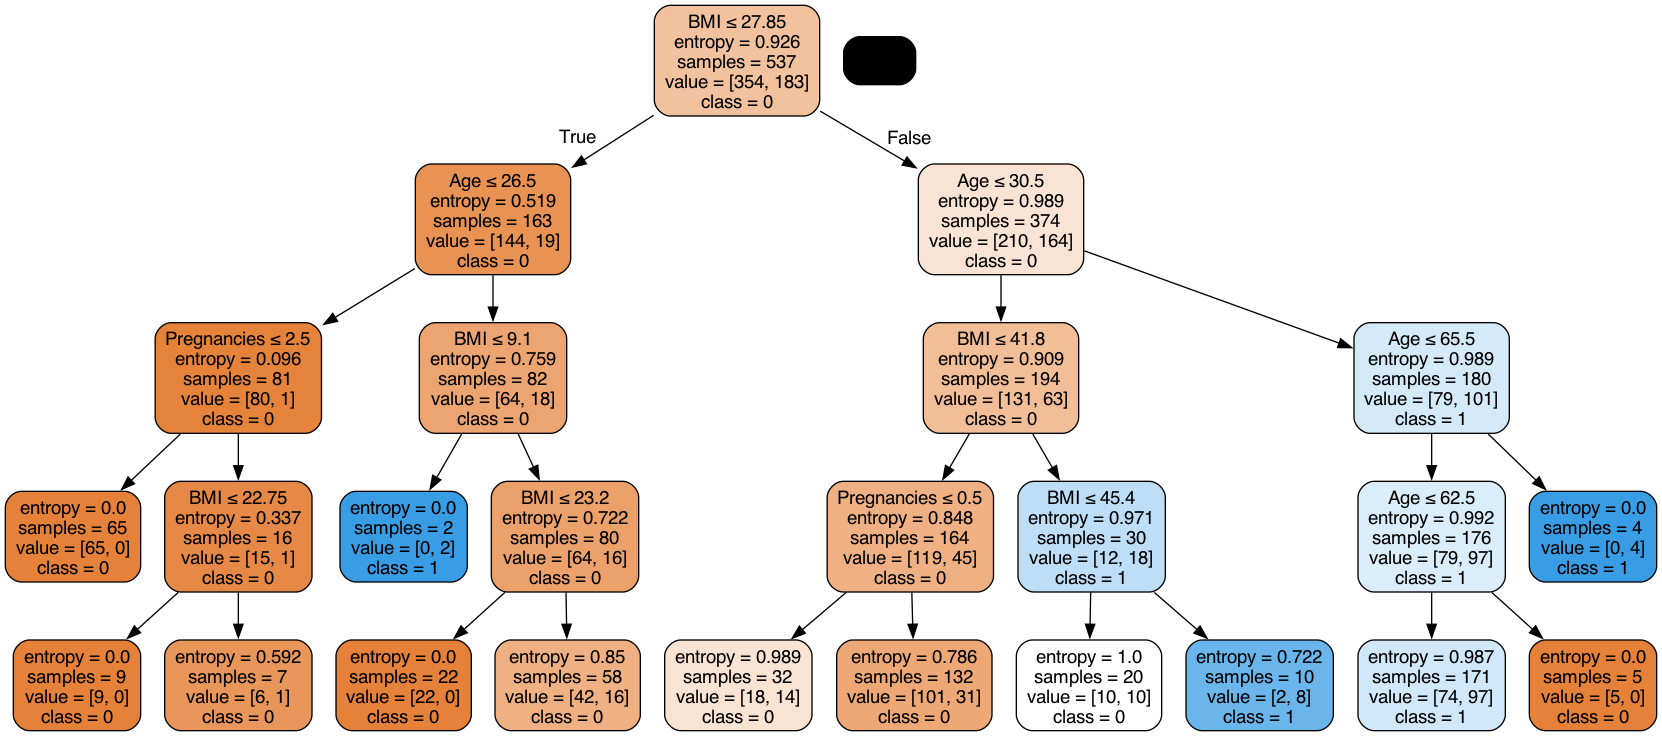

In [23]:
#!pip install graphviz
import sklearn
from six import StringIO
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = ['Pregnancies','BMI','Age'],class_names=['0','1','2','3','4','5'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

# we see that root node splits on BMI because it's the most important feature for classification
# samples with BMI ≤ 27.85 mostly belong to class 0 (majority class), while samples with higher BMI show more class diversity

# left subtree: samples with BMI ≤ 27.85, further splits occurs on Age and Pregnancies
# a majority of instances are classified as class 0 (low entropy) in this branch, reflecting a strong association between low BMI and class 0

# right subtree: samples with BMI > 27.85, further splits occurs on Age ≤ 30.5 and BMI ≤ 41.8
# this branch contains more instances of class 1 as BMI and age increase, suggesting these are associated with the minority class

# Entropy:
#Nodes with entropy = 0 represent pure splits where all samples belong to one class. Nodes with higher entropy (e.g., around 0.9) 
# indicate less certainty in classification, with a mix of classes

# class imbalance: The tree is heavily skewed toward class 0, as reflected in the dominance of orange nodes. 
# This aligns with the likely class imbalance observed earlier.

# Feature importance: BMI is the most critical feature, appearing in multiple splits across the tree.
#  Age and Pregnancies also contribute but are secondary in influence.

In [25]:
# Logistic Regression - just an example
import numpy
#X represents the size of a tumor in centimeters.
X = numpy.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)

#Note: X has to be reshaped into a column from a row for the LogisticRegression() function to work.

#y represents whether or not the tumor is cancerous (0 for "No", 1 for "Yes").
y = numpy.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

from sklearn import linear_model

logr = linear_model.LogisticRegression()
logr.fit(X,y)

#predict if tumor is cancerous where the size is 8mm:
predicted = logr.predict(numpy.array([8]).reshape(-1,1))
print(predicted)

[1]


In [26]:
#split dataset in features and target variable

#, 'BMI', 'Age','Glucose','BloodPressure'
X = data1[['Pregnancies','Age','BMI']] # Features
y = data1['Outcome'] # Target variable

In [ ]:
# again, split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [28]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
#The choice of 16 is likely arbitrary and could have been any non-negative
#integer. The key is that if you or someone else wants to reproduce the exact
#same results, they can use the same random state value.
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [29]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

#confusion matrix
#               Predicted Positive    Predicted Negative
#Actual Positive        TP                    FN
#Actual Negative        FP                    TN

array([[112,  13],
       [ 44,  23]])

Text(0.5, 427.9555555555555, 'Predicted label')

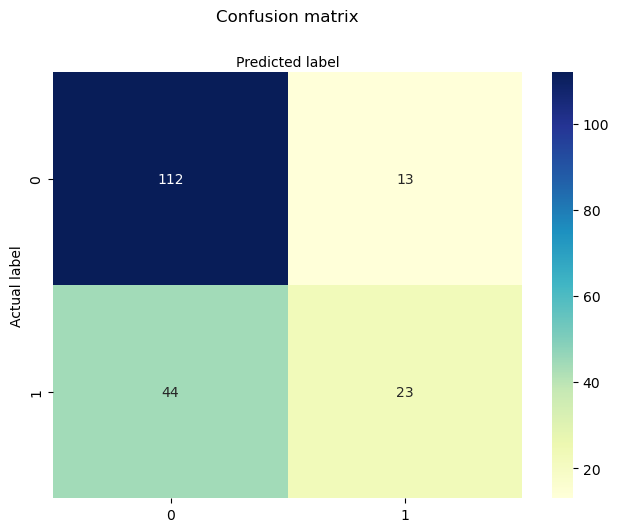

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [37]:
from sklearn.metrics import classification_report
target_names = ['not pregnant', 'pregnant']
print(classification_report(y_test, y_pred, target_names=target_names))

# overall accuracy: 70% (The model correctly classified 70% of the total instances.) 
# While decent, accuracy alone isn't sufficient to assess performance, especially with class imbalance.

# ----- Class-wise performances -----

# class 0 (not pregnant precision): 0.72 meaning that of all instances predicted as "not pregnant," 72% were correct.
# This indicates a low false-positive rate for this class because false positives are instances incorrectly predicted as "not pregnant."    
# recall: 90%  The model correctly identified 90% of the actual "not pregnant" instances. 
# This high recall indicates a low false-negative rate for this class. 
# F1-Score (80%): A strong balance between precision and recall for the "not pregnant" class.
# Support: 125 instances of "not pregnant" in the test set.

# class 1 (pregnant precision): 0.64 meaning that of all instances predicted as "pregnant," 64% were correct.
# recall: 34% The model correctly identified 34% of the actual "pregnant" instances.
# this class has a high false-negative rate, as the model missed many actual "pregnant" instances.
# F1-Score (45%): A moderate balance between precision and recall for the "pregnant" class.
# Support: 67 instances of "pregnant" in the test set.

# ----- Summary -----
# Macro Average Precision (68%): Average precision across both classes is moderate. 
# Recall (62%): Average recall is relatively low, dragged down by poor performance for the "pregnant" class. 
# F1-Score (62%): Indicates the overall balance between precision and recall across classes is suboptimal.

# Weighted Average Precision (69%): Slightly higher due to more "not pregnant" instances in the dataset. 
# Recall (70%): Matches accuracy since it's weighted by the class distribution.
# F1-Score (67%): Reflects the skewed performance due to the imbalance between classes.

# Class Imbalance The dataset is imbalanced with more instances of "not pregnant" (125) than "pregnant" (67). 
# This imbalance likely affects the model's ability to detect the minority class ("pregnant"), as seen in its low recall (34%).


              precision    recall  f1-score   support

not pregnant       0.72      0.90      0.80       125
    pregnant       0.64      0.34      0.45        67

    accuracy                           0.70       192
   macro avg       0.68      0.62      0.62       192
weighted avg       0.69      0.70      0.67       192



In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)
#Accuracy = TP+TN/TP+FP+FN+TN

0.703125

In [39]:
#Recall = TP/TP+FN
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='macro')

0.6196417910447761

In [40]:
#Precision = TP/TP+FP
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average='macro')

0.6784188034188035